## Project Overview

Electrocardiography (ECG) is a key diagnostic tool to assess the cardiac condition of a patient.

This project is conducted for pedagogical purposes as part of my learning journey in data analytics. The goal is to apply analytical techniques on real-world data and improve practical skills in data exploration, analysis, and visualization. And a following step to this analytics notebook is to further exploring and analyzing the (SCP statements) dataset and conduct 'VCG' Analysis afterwards.

This is a General Overview of the 'PTB-XL, a large publicly available electrocardiography dataset'
To find out more, visit [PTB-XL](https://physionet.org/content/ptb-xl/1.0.3/#files-panel)

**The goal** is to investigate the data and conduct visualizations to better understand the data.
<br/>  
*This notebook has 3 parts:*

**Part 1:** Imports, and loading

**Part 2:** Data Exploration

**Part 3:** Data Wrangling & Building visualizations

## Packages import & Data Loading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"ptbxl_database.csv")
df.head(5)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


## Data Exploration

In [7]:
df.head(3)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr


**Inital Exploration**

After initially looking at the data, each record is identified by a unique *ecg_id*. The corresponding patient is encoded via *patient_id*.

The data also contains general metadata and demographics about the patients such as *age*, *sex*, *height*, *weight*, *nurse*, *site*, *device* and *recording_date*.

*scp_codes* a report string (generated by cardiologist or automatic interpretation by ECG-device) which was converted into a standardized set of SCP-ECG (SCP-ECG statements as a dictionary with entries of the form statement: likelihood, where likelihood is set to 0 if unknown). For example the very first patient or record contains an scpe_code >> {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}, which means the patient is very likely to be in a normal condition and has no serious problems. He is very unlikely to has 'LVOLT' or 'Left Ventricular Outflow Tract Obstruction' and also a 0% chance of having 'SR' or 'Sinus Rhythm Syndrome'. 

Additional fields are *heart_axis*, *infarction_stadium1*, *infarction_stadium2*, *validated_by*, *second_opinion*, *initial_autogenerated_report* and *validated_by_human*.

The paths to the original record (500 Hz) and a downsampled version of the record (100 Hz) are stored in *filename_hr* and *filename_lr*.

There are info about signal metadata or the signal quality such as noise *static_noise and burst_noise*, *baseline_drift* and other artifacts such as *electrodes_problems*.

In [8]:
df.shape

(21799, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

**Dataset Information into data types, and missing values**

The PTB-XL ECG dataset is a large dataset of 21799 records and 28 columns.
With  the variables 'height', and 'weight' containing over 10 thousand null values. 'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', and 'pacemaker' have an extremely large number of null values. 

And data types vary between being a:

1. **float**: these are the data which are decimal numbers with 16-bit precision such as ('age', 'height', 'weight', 'nurse'  , 'site',and 'validated_by'). strangly 'nurse', 'site', and 'validated_by' are of type 'float' number where each number corresponds to a certain nurse, site, or a cardiologest but as cited on the data's catalog >> (Personal information in the metadata, such as names of validating cardiologists, nurses and recording site (hospital etc.) of the recording was pseudonymized.).
2. **int**: these are real or whole number values such as ('sex', and 'strat_fold'), with the 'sex' columns can be considered of a bool dtype.
3. **object**: these are the data which are string or providing textual information such as ('device', 'recording_date', 'report', 'scp_codes', 'heart_axis', 'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker', 'filename_lr',  and 'filename_hr')
4. And finally **bool**: these are the values being represented as boolean values (True or False, 0 or 1) and give an info about a variable of two different possibilities like ('second_opinion', 'initial_autogenerated_report', and 'validated_by_human')

In [10]:
df.describe(include = 'all')

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
count,21799.000000,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,21799,21799,21799,21799,13331,5612,103,12421.000000,21799,21799,21799,1598,3260,613,30,1949,291,21799.000000,21799,21799
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,21795,9887,5463,8,6,3,NaN,2,2,2,317,124,103,14,128,4,NaN,21799,21799
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS100 3,1992-02-06 11:47:42,sinus rhythm. normal ecg.,"{'NORM': 100.0, 'SR': 0.0}",MID,unknown,Stadium III,NaN,False,False,True,", V6",", I-AVR,",alles,V6,1ES,"ja, pacemaker",NaN,records100/00000/00001_lr,records500/00000/00001_hr
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6140,2,1734,6142,7687,3430,65,NaN,21244,14986,16056,221,953,140,8,405,285,NaN,1,1
mean,10926.658379,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.503005,NaN,NaN
std,6302.393366,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.178003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.874948,NaN,NaN
min,1.000000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,5469.500000,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,10926.000000,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN
75%,16386.500000,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN


In [11]:
df.nlargest(500, 'age')['age'].value_counts()

age
300.0    293
88.0     109
89.0      98
Name: count, dtype: int64

This complete **summary statistics** table provides us with interesting information wheather it's a numeric column or a categorical one.

1. With **ages** covering the whole range from 0 to 95 years (median 62 and interquantile range of 22), the 'ages' column also unexpectedly contain 293 patient with ages of unrealistic number (300) and this as mentioned on the data's catalog 'The date of birth only as age at the time of the ECG recording, where ages of more than 89 years appear in the range of 300 years in compliance with HIPAA standards.' clarifies that those patients are above 89 years old.
2. The most of **height** values are ranging between 160 to 174 centimeters tall ( Q1 to Q3 ).
3. **weight** values are ranging from 5 up to 250 kilograms, with a median value of 70 Kg, and standard deviation of 15 kg.
4. The most common **device name**  that stored the data of patients was 'CS1003' machine with 6140 patients' data records.
5. and **heart axis** most common value of 'MID' by frequency of '7687' values which represents (the QRS axis, represents the direction of the electrical depolarization in the heart's ventricles during a heartbeat.The normal cardiac axis is typically directed downward and slightly to the left, indicating that the left ventricle is the dominant chamber of the heart.)

## Data Wrangling & Visualization

In [12]:
df['nurse'].value_counts()

nurse
0.0     8295
1.0     5709
5.0      648
3.0      642
2.0      639
7.0      639
4.0      635
6.0      631
8.0      626
10.0     626
11.0     619
9.0      617
Name: count, dtype: int64

The nurses '0' and '1' have been resoponsible for the largest number of patients with numbers above 5000 patients.

In [13]:
site_counts = df['site'].value_counts().sort_index()
site_counts.index = site_counts.index.astype(int)
site_counts.head(10)

site
0    8940
1    6294
2    5075
3     576
4     100
5      58
6      46
7      43
8      43
9      38
Name: count, dtype: int64

The most common hospitals/clinics that have taken care of pateints and where the data were collected were '0', '1', and '2'.

In [11]:
df['device'].value_counts()

device
CS100    3    6140
CS-12         4048
AT-6 C 5.5    3950
CS-12   E     2878
AT-6     6    2273
AT-60    3     966
AT-6 C 5.8     824
AT-6 C         514
AT-6 C 5.0      80
AT-6 C 5.3      67
AT-6 C 5.6      59
Name: count, dtype: int64

Here's the list of the devices that stored the patients' data 

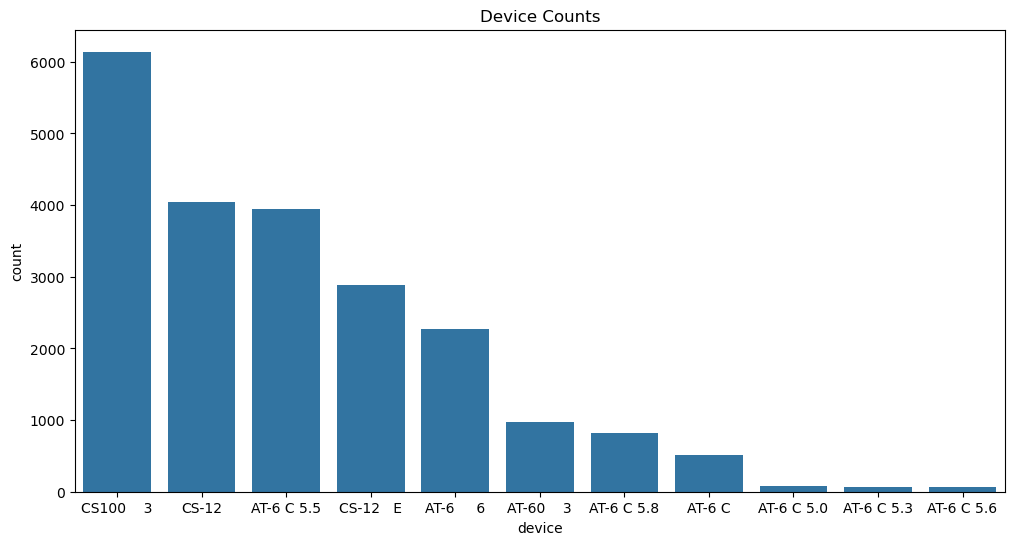

In [12]:
counts_df = df['device'].value_counts().reset_index()
counts_df.columns = ['device', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=counts_df, x='device', y='count')
plt.title("Device Counts")
plt.show()

Thi bar chart shows the relative comparison between them and shows that 'CS100  3' is the most used, and 'AT-6 C 5, 5.3. and 5.6' were the least used to store the data.

In [37]:
top_10 = df['report'].value_counts().reset_index().head(10)
top_10

,report,count
0,sinus rhythm. normal ecg.,1734
1,sinusrhythmus lagetyp normal normales ekg,1264
2,sinusrhythmus lagetyp normal normales ekg 4.46 unbestÄtigter bericht,1045
3,sinusrhythmus normales ekg,687
4,trace only requested.,343
5,sinusrhythmus linkstyp sonst normales ekg,252
6,sinusrhythmus linkstyp sonst normales ekg 4.46 unbestÄtigter bericht,247
7,sinus rhythm. no definite pathology.,230
8,schrittmacher ekg 4.46 unbestÄtigter bericht,198
9,sinusrhythmus lagetyp normal unspezifisches abnormes t 4.46 unbestÄtigt...,149


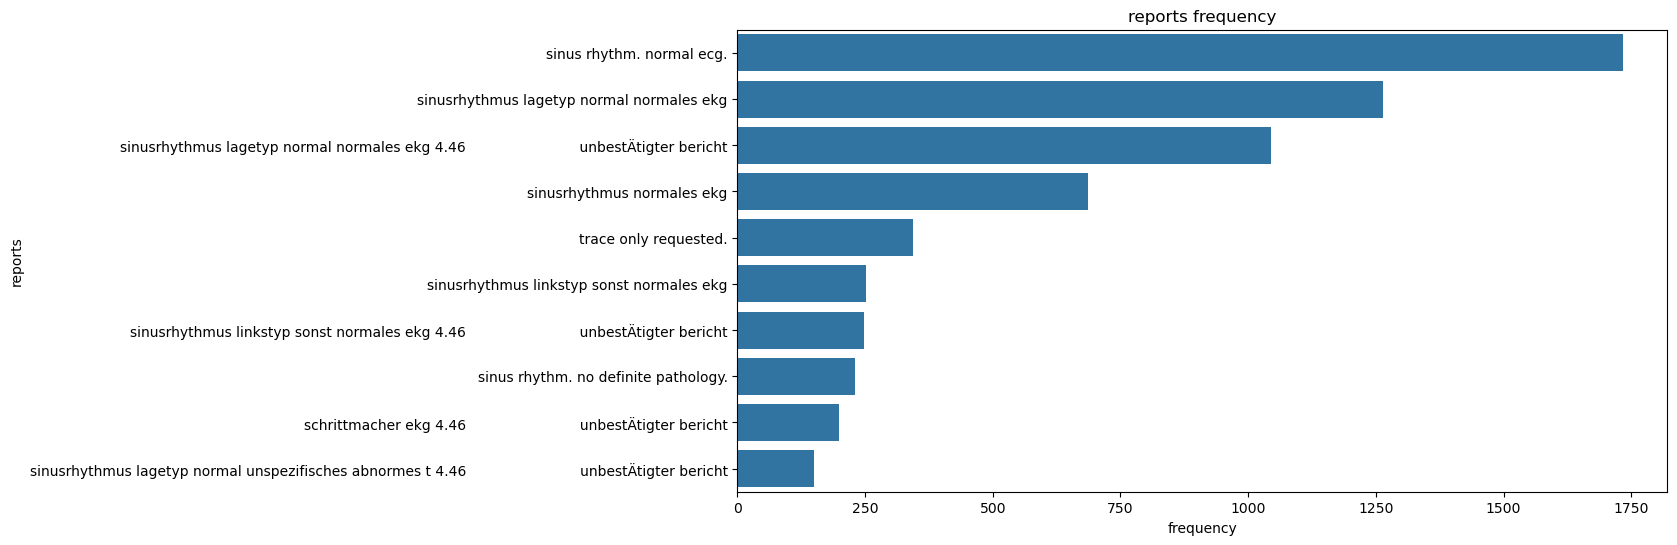

In [39]:
reports_df = df['report'].value_counts().reset_index().head(10)
reports_df.columns = ['reports', 'frequency']

plt.figure(figsize=(12,6))
sns.barplot(data=reports_df, x='frequency', y='reports')
plt.title("reports frequency")
plt.show()

The top 10 most frequent reports regarding each patient result

In [15]:
df['heart_axis'].value_counts()

heart_axis
MID     7687
LAD     3764
ALAD    1382
RAD      221
ARAD     122
AXL      101
AXR       51
SAG        3
Name: count, dtype: int64

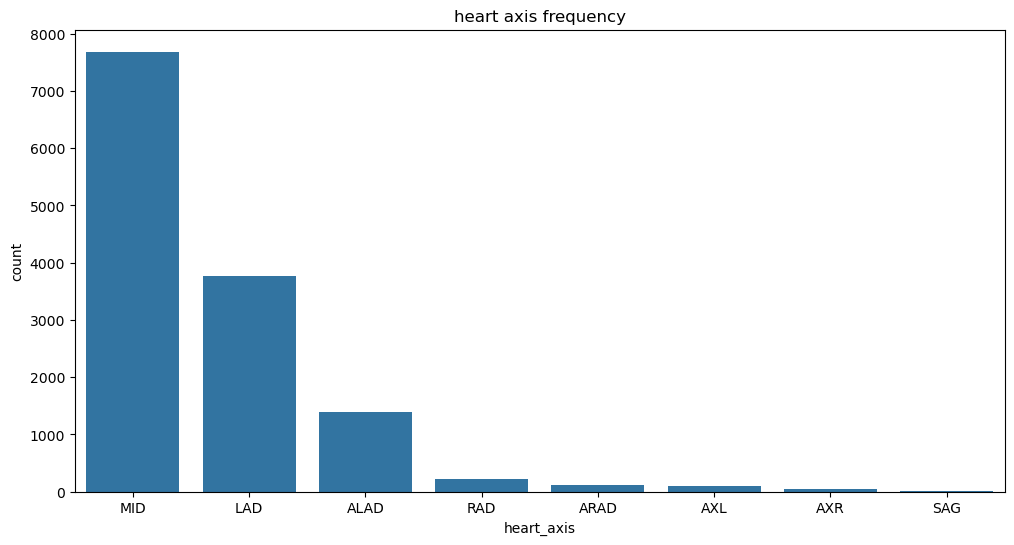

In [16]:
hr_df = df['heart_axis'].value_counts().reset_index()
hr_df.columns = ['heart_axis', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=hr_df, x='heart_axis', y='count')
plt.title("heart axis frequency")
plt.show()

**The heart axis** refers to the average direction of electrical impulses as they travel through the ventricles during a heartbeat. It acts as an indicator of the heart's electrical health and is determined by the net effect of all generated action potentials within the heart.Here are the most common ones across the pateints in the data provided.

1. (MID) or The mid electrical axis of the heart is considered a normal direction when it falls within the range of -30° to +90°. This range indicates that the average direction of ventricular depolarization during contraction is typical for the heart's longitudinal axis, which is generally to the left and downwards.

2. Left Axis Deviation (LAD) is a condition where the mean electrical axis of the heart's ventricular contraction lies in a frontal plane direction between -30° and -90°.

## Resources

1. [CS 100 Machine](https://www.getinge.com/int/products/cs100-iabp-with-intellisync/)
2. [LAD](https://litfl.com/left-axis-deviation-lad-ecg-library/)
3. [More info into Heart Axis codes](https://litfl.com/ecg-axis-interpretation/)